<a href="https://colab.research.google.com/github/kasev/mops/blob/master/scripts/freqs_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
# defining function for saving+downloading the latest figure

def download_figure(fig=None, filename=None):
  if (filename==None) | (".png" not in str(filename)):
    filename = "figure.png"
  if fig==None:
    plt.savefig(filename)
  else:
    fig.savefig(filename)
  files.download(filename)

In [3]:
bidecades_freqs_complete = pickle.load(urlopen("https://github.com/kasev/mops/raw/master/data/bidecades_freqs_complete.pickle"))

In [4]:

palette = sns.color_palette(None, 3)

In [72]:
bidecades_strs = ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']

from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter(useMathText=False)
formatter.set_powerlimits((-8, 8))
formatter.set_scientific(False)

def plot_bidecade_freq(terms, figsize=(6,4)):
    fig, ax = plt.subplots(tight_layout=True, figsize=figsize, dpi=150)
    fig.patch.set_facecolor("black")
    ax.set_facecolor("black")
    if type(terms) == list:
      colors = sns.color_palette(None, len(terms))
      for term, color in zip(terms, colors):
        data = [freqs[term] if term in freqs.keys() else 0 for freqs in bidecades_freqs_complete]
        ax.plot(data, linewidth=2, color=color, label=term)
      ax.set_title(", ".join(terms), pad=-14)
    else:
      term = terms
      data = [freqs[term] if term in freqs.keys() else 0 for freqs in bidecades_freqs_complete]
      ax.plot(data, linewidth=2)
      ax.set_title(term, pad=-14, color="white")
    ax.set_xticks(range(0,6))
    #ax.ticklabel_format(axis="y", style="plain") # scilimits=(0,0), style="sci")# "plain")
    ax.set_xticklabels(bidecades_strs, color="white", rotation=90)
    ax.set_yticklabels(['{:.6f}'.format(el) for el in ax.get_yticks()], color="white")
    ax.set_xlabel("bidecade", color="white")
    ax.set_ylabel("freq", color="white")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.legend(facecolor="black", labelcolor="white")
    return fig

<ipython-input-72-f0ab57b95f0a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.6f}'.format(el) for el in ax.get_yticks()], color="white")


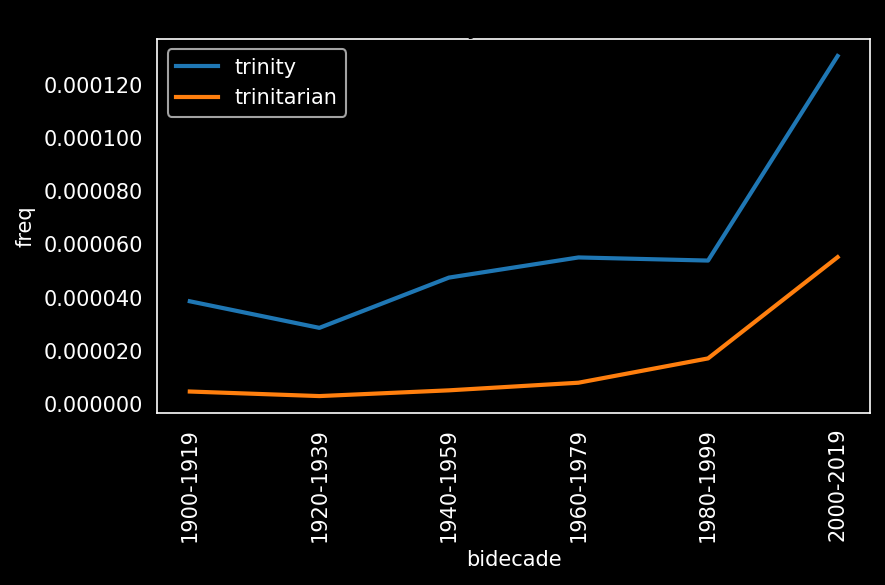

In [73]:
fig = plot_bidecade_freq(["trinity", "trinitarian"], figsize=(6,4))

In [ ]:
download_figure(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
np.set_printoptions(suppress=True)

In [67]:
str(np.round(6.903725180790451e-05, 6))

'6.9e-05'